In [22]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

In [23]:
df = pd.read_csv("cleaned-BA-reviews.csv")

#let's also check the index are in order
df = df.reset_index(drop=True)

In [24]:
df.head()

,Unnamed: 0,reviews,date,country,stars,verified,corpus
0,0,✅ Trip Verified | Came from Glasgow to London...,2023-06-30,United States,5,True,came glasgow london took connecting flight ame...
1,1,✅ Trip Verified | My flight on on 12 May 2023...,2023-06-29,United Arab Emirates,1,True,flight may got delayed hour minute resulted ca...
2,2,Not Verified | Cairo is a 5 hour flight and B...,2023-06-29,United Kingdom,1,False,verified cairo hour flight ba considers short ...
3,3,✅ Trip Verified | After travelling London to ...,2023-06-27,United Kingdom,2,True,travelling london madrid british airway iberia...
4,4,✅ Trip Verified | My luggage was mis-tagged i...,2023-06-27,United States,1,True,luggage mi tagged dallas way cairo via london ...


Overall rating given for British Airways?

In [25]:
df.stars.mean()

2.7614285714285716

Text(0.5, 0.98, 'Counts for each ratings')

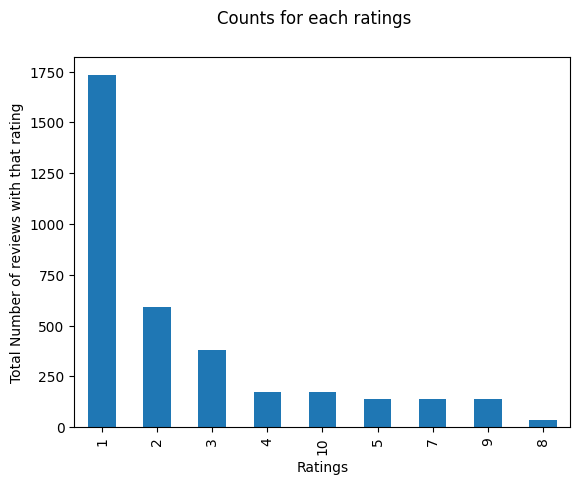

In [26]:
# What is the total counts for each ratings?
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")


In [27]:
df_ratings = pd.DataFrame(df.stars.value_counts())
pct_values = (df_ratings.stars.values/ df_ratings.stars.values.sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

In [28]:
df_ratings = df_ratings.reset_index()

In [29]:
df_ratings.rename(columns={'index':'Stars', 'stars':'total_counts'}, inplace=True)

In [30]:
df_ratings

,Stars,total_counts,pct_values
0,1,1733,49.51
1,2,589,16.83
2,3,381,10.89
3,4,174,4.97
4,10,174,4.97
5,5,139,3.97
6,7,138,3.94
7,9,138,3.94
8,8,34,0.97


Text(0.5, 1.0, 'Counts for each ratings')

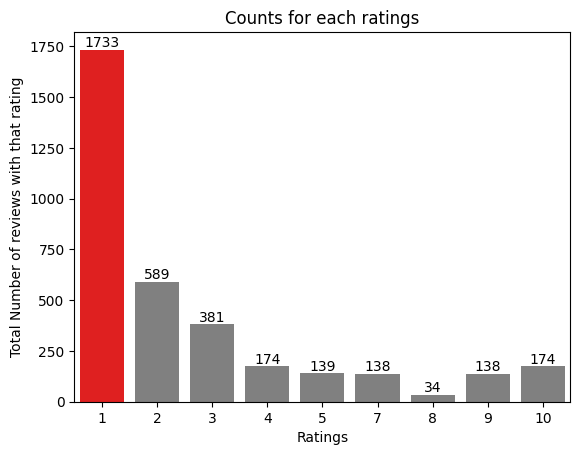

In [31]:
clrs = ['Red' if (x ==  max(df_ratings.total_counts)) else 'grey' for x in df_ratings.total_counts ]
ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
                palette=clrs)


ax.bar_label(ax.containers[0])

ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")

Which country most review comes from?

In [32]:
print(f"{len(df.country.unique())} unique countries")

18 unique countries


In [33]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()
print(df_country_review)

            index  country
0  United Kingdom     1610
1   United States     1085
2       Australia      140
3          Canada      105
4     Netherlands       70


In [34]:
df_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)
print(df_country_review)

          country  total_reviews
0  United Kingdom           1610
1   United States           1085
2       Australia            140
3          Canada            105
4     Netherlands             70


Text(0.5, 1.0, 'Maximum number of review by country')

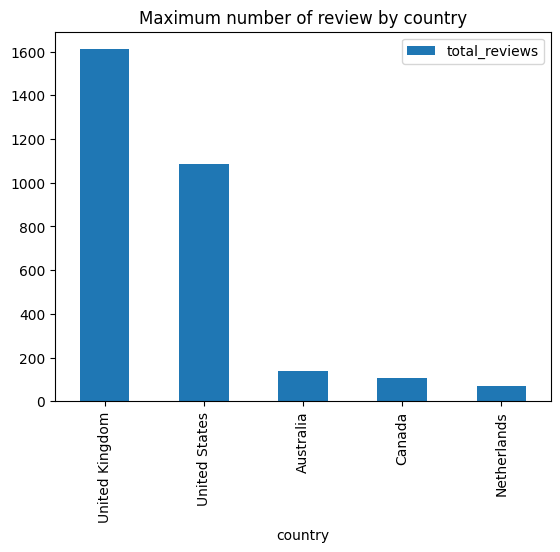

In [35]:
df_country_review.plot(kind="bar", x='country')
plt.title("Maximum number of review by country")

Which country provided on average highest ratings?

<ipython-input-36-be211bca4d14>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

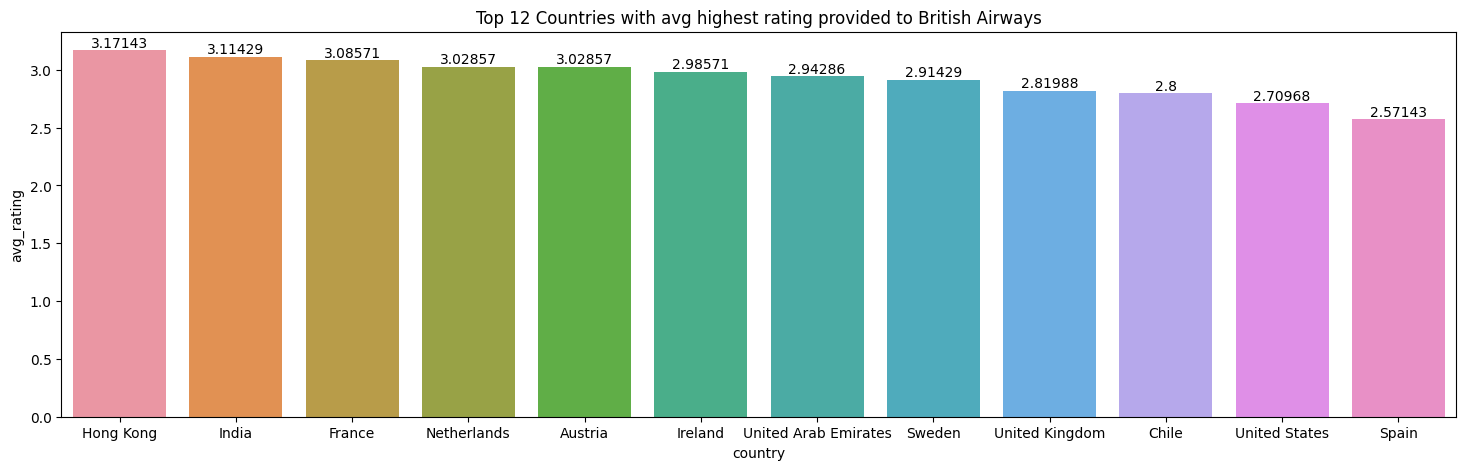

In [36]:
df_country_rating = pd.DataFrame(df.groupby('country').mean()['stars'].sort_values(ascending=False)).reset_index()
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:12])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")

In [37]:
df.date = pd.to_datetime(df.date)
fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


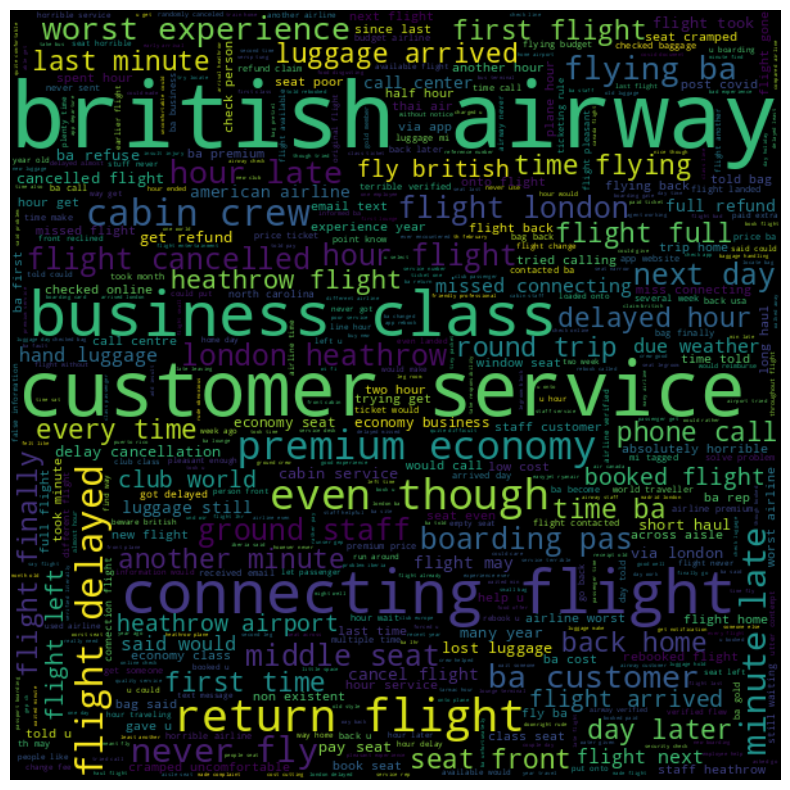

In [38]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are many words that does not set the idea of whether the review is positive or negative. For example words like "passenger", "flight", etc. does not add conlcusive value hence we can include them in stopwords list.

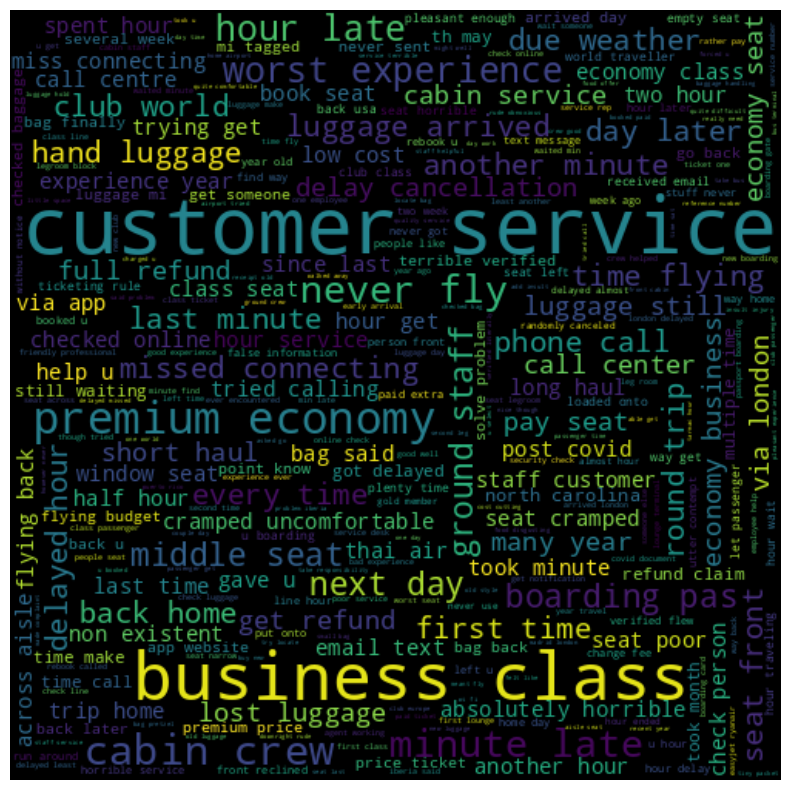

In [39]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])

# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Word Frequency**

In [40]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'hour'),
  Text(4, 0, 'customer'),
  Text(5, 0, 'staff'),
  Text(6, 0, 'airport'),
  Text(7, 0, 'day'),
  Text(8, 0, 'check'),
  Text(9, 0, 'minute'),
  Text(10, 0, 'bag'),
  Text(11, 0, 'luggage'),
  Text(12, 0, 'class'),
  Text(13, 0, 'business'),
  Text(14, 0, 'crew'),
  Text(15, 0, 'told'),
  Text(16, 0, 'verified'),
  Text(17, 0, 'experience'),
  Text(18, 0, 'food'),
  Text(19, 0, 'fly')])

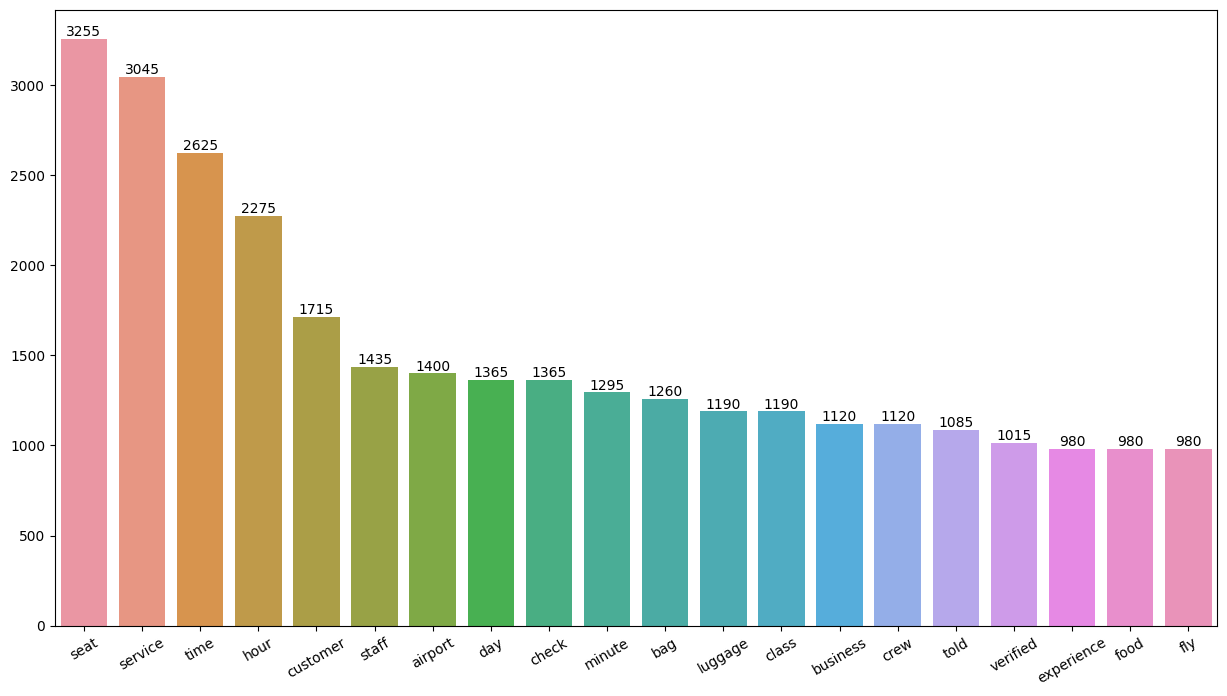

In [41]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

This gives us a glimpse of what customers are really talking about here. We see that "Seat" is most talked about the airline followed by "Service" and "time" which are all very important to customers in terms of service. However, we still do not know is how they are expressing about each of this service. To bring some significane to these terms we will use ngram plots to see if they are bad or good in experience.

# **Word Frequency with N-gram**

<Axes: >

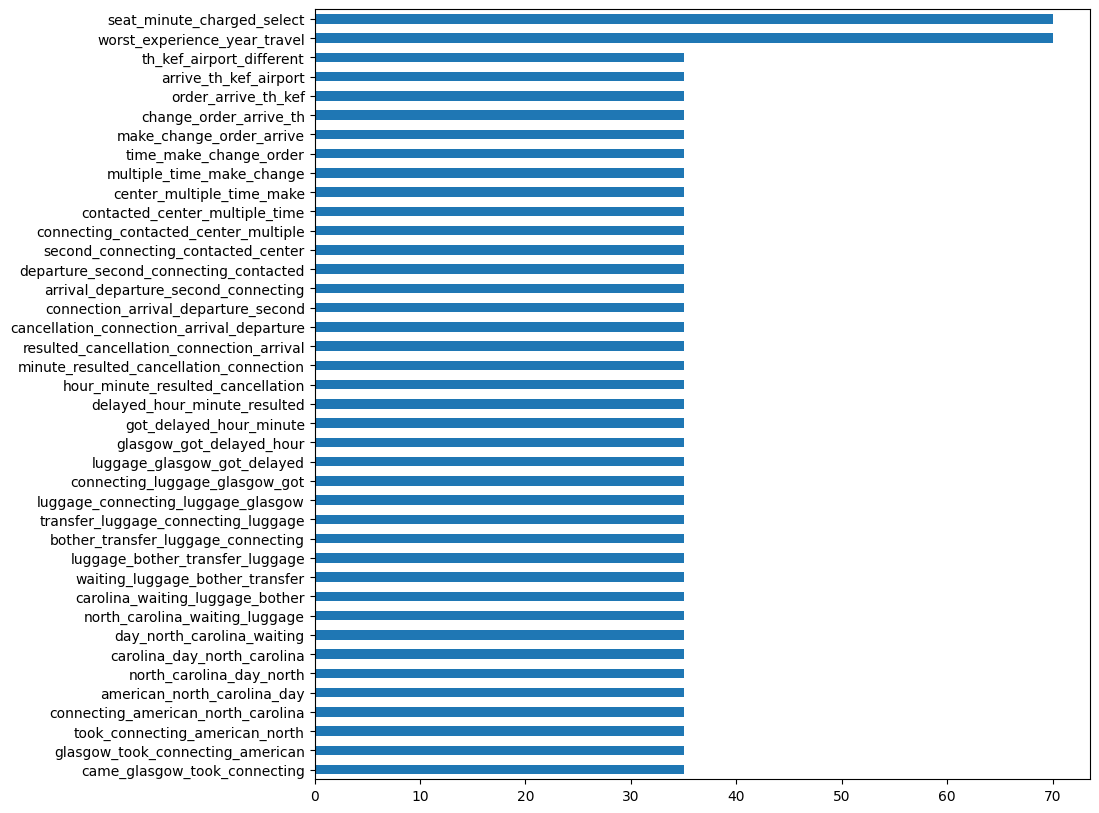

In [42]:
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams

    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")

    return ax


get_freq_dist(new_words,4)

We can see that there are very common negetive terms regarding flight delay, multiple changes and luggage issue at North Carolina.

> Indented block



However, there is one another approach that we can try to find the word frequencies which will give us better idea. We will group the reviews based on ratings. Say, we assume ratigs 1-3 are bad reviews, 4-6 are average/good experience and 7-10 indicates a great experience.

In [43]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]

<Axes: >

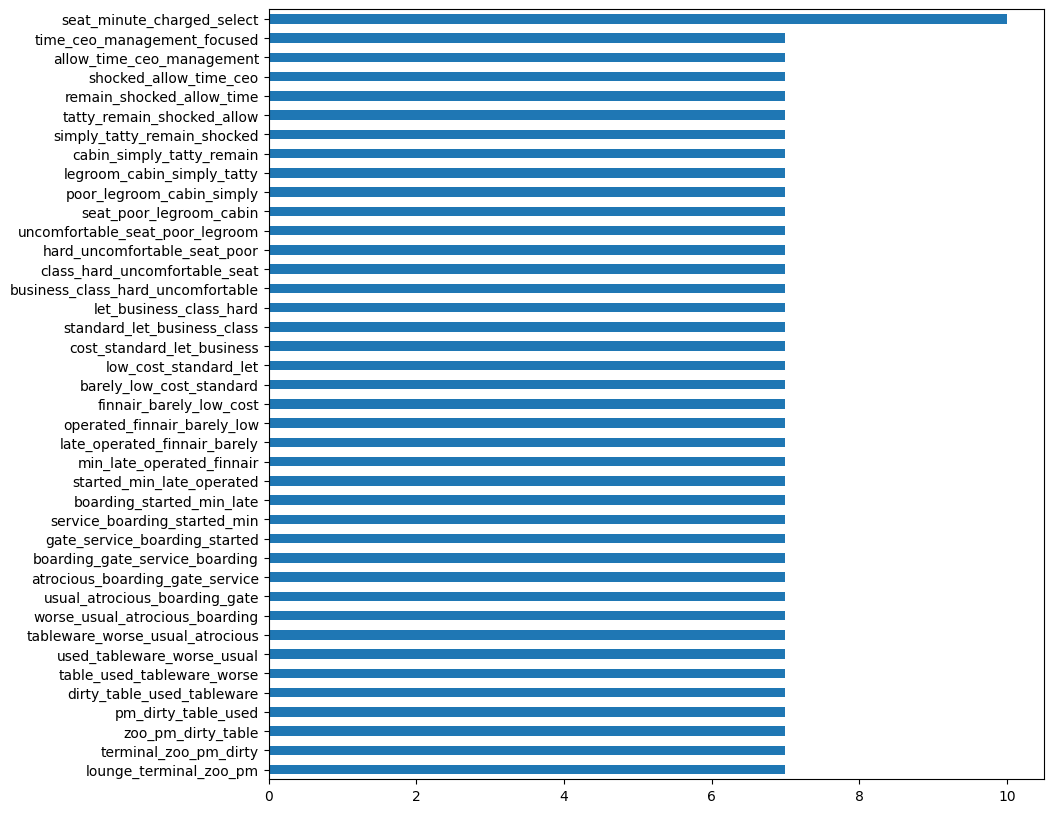

In [45]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)


<Axes: >

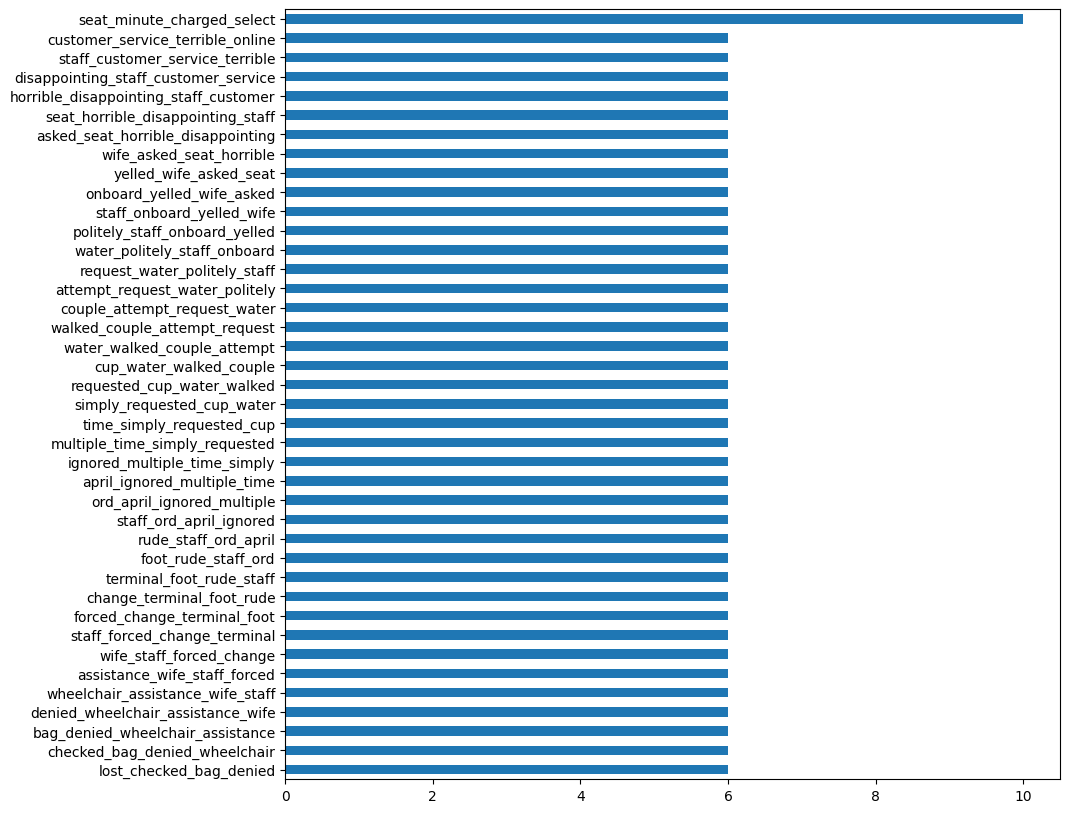

In [46]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<Axes: >

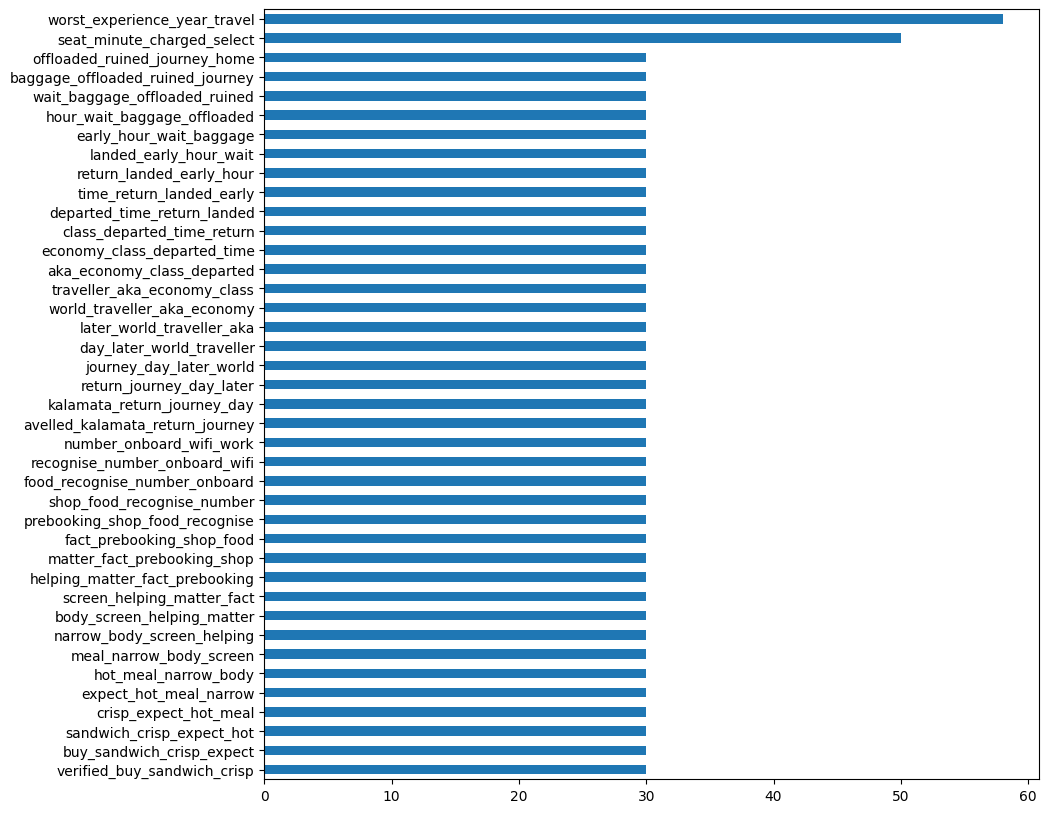

In [47]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

Now we will use textblob library to define if the text is negative or positive and to what extent

In [48]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#set a column Polarity with all 0 values initially
df['polarity'] = 0

for i in range(len(df.corpus)):
    sent= TextBlob(df.corpus[i])
    polarity  = sent.sentiment.polarity
    subjectivity  = sent.sentiment.subjectivity
    df['polarity'][i] = polarity


In [49]:
# let's see how many texts are with positive comments

print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")

2625 number of reviews between -0.2 and 0.2 polarity score
1750 number of reviews between -0.1 and 0.1 polarity score


Polarity score is given between -1 to 1 and more close the value to -1, it indicates negative review and vice versa is true for positive value. If we consider a threshold where any review with polarity greater than 0.2 is positive and less than -0.2 is negative, we are left with 2625 reviews that lies in the neutral zone. To further narrow down this number of neutral reviews, let's take the threshold of 0.1.



We will try another method of labelling the reveiws as positives or negatives. In this we will use VADER algorihtm by nltk library.

In [55]:
%%capture
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vds = SentimentIntensityAnalyzer()
# text = 'This is an extremely entertaining movie'

#set a column Polarity with all 0 values initially
df['label'] = 0

for i in range(len(df.corpus)):

    score = vds.polarity_scores(df.corpus[i])['compound']
    #print(score)
    if score > 0.2:
        df['label'][i] = 1
        #print("1st")
    elif score < 0:
        df['label'][i] = -1
        #print("2nd")
    else:
        df['label'][i] = 0

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [52]:
df.label.value_counts()

-1    2450
 1    1015
 0      35
Name: label, dtype: int64

# Topic Modeling with LDA
We have already cleaned our reviews, however, for topic modeling we will also require word embeddings or (words matrix). For this purpose we will use count vectorizer method from sklearn library.

In [57]:
%%capture
from sklearn.feature_extraction.text import CountVectorizer

#create an object of count vectorizer
vect = CountVectorizer()

#apply transformation
tf = vect.fit_transform(df.corpus).toarray()
tf_feature_names = vect.get_feature_names_out()

In [58]:
from sklearn.decomposition import LatentDirichletAllocation

#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]

df_topic =pd.DataFrame(topic_dict)

In [59]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights
0,flight,1645.1,seat,525.1,airline,385.1,flight,1365.1,flight,1660.6,flight,1983.9,flight,875.1,flight,905.8
1,ba,770.1,flight,385.1,get,315.1,ba,805.1,hour,838.1,ba,1489.2,seat,350.1,customer,595.1
2,would,385.1,service,280.1,flight,315.1,get,385.1,seat,700.1,time,820.2,service,350.1,service,595.1
3,airline,385.1,good,210.1,boarding,280.1,minute,350.1,bag,665.1,seat,805.1,minute,315.1,luggage,420.1
4,hour,350.1,british,210.1,class,280.1,service,350.1,time,595.1,economy,525.1,one,280.1,ba,401.0
5,call,315.1,airway,210.1,seat,280.1,take,315.1,told,560.1,make,485.1,time,245.1,airline,385.1
6,service,315.1,class,175.1,british,245.1,could,315.1,service,525.1,one,455.1,wir,245.1,get,370.1
7,even,280.1,business,175.1,business,245.1,hour,315.1,ba,525.1,heathrow,420.1,ba,245.1,lhr,350.1
8,staff,245.1,quick,175.1,airway,245.1,check,280.1,airway,420.1,premium,420.1,arrived,210.1,staff,340.1
9,experience,245.1,customer,140.1,service,245.1,day,280.1,home,385.1,business,385.1,heathrow,210.1,one,315.1


There are certain words that are not useful to detect the tone of the reviews overall like "britsh airways", "passenger", "flight", etc.

In [60]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[0.09556254, 0.        ],
       [0.48151747, 0.        ],
       [0.03907727, 0.65770491],
       ...,
       [0.50609225, 0.        ],
       [0.06836627, 0.04620641],
       [0.10910447, 0.18502719]])

In [61]:
topic_dict = {}

#loop through model components
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]

df_topic =pd.DataFrame(topic_dict)
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights
0,flight,17.4,seat,6.8
1,ba,6.3,ba,3.8
2,hour,3.8,service,3.6
3,get,3.2,time,3.2
4,day,2.9,flight,2.1
5,booked,2.8,business,1.8
6,service,2.6,class,1.7
7,airline,2.5,one,1.7
8,could,2.5,good,1.7
9,airport,2.4,customer,1.6
